## Creating a covariance and corelation matirx of stocks returns with python

In [19]:
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import yfinance as yf


In [20]:
end=dt.datetime.now()
start=dt.date(end.year-1,end.month,end.day)

In [21]:
portfolio=['GOOG','AAPL','MSFT','TSLA','^GSPC','^BSESN']

In [22]:
df=yf.download(portfolio,start,end)['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [23]:
df

,AAPL,GOOG,MSFT,TSLA,^BSESN,^GSPC
Date,,,,,,
2023-04-10,161.169724,106.949997,287.034241,184.509995,59846.511719,4109.109863
2023-04-11,159.946259,106.120003,280.527618,186.789993,60157.718750,4108.939941
2023-04-12,159.249969,105.220001,281.182251,180.539993,60392.769531,4091.949951
2023-04-13,164.680969,108.190002,287.480560,185.899994,60431.000000,4146.220215
2023-04-14,164.332840,109.459999,283.810699,185.000000,NaN,4137.640137
...,...,...,...,...,...,...
2024-04-01,170.029999,156.500000,424.570007,175.220001,74014.546875,5243.770020
2024-04-02,168.839996,155.869995,421.440002,166.630005,73903.906250,5205.810059
2024-04-03,169.649994,156.369995,420.450012,168.380005,73876.820312,5211.490234


In [24]:
returns=df.pct_change()

In [25]:
returns

,AAPL,GOOG,MSFT,TSLA,^BSESN,^GSPC
Date,,,,,,
2023-04-10,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-11,-0.007591,-0.007761,-0.022668,0.012357,0.005200,-0.000041
2023-04-12,-0.004353,-0.008481,0.002334,-0.033460,0.003907,-0.004135
2023-04-13,0.034104,0.028227,0.022399,0.029689,0.000633,0.013263
2023-04-14,-0.002114,0.011739,-0.012766,-0.004841,0.000000,-0.002069
...,...,...,...,...,...,...
2024-04-01,-0.008456,0.027847,0.009151,-0.003242,0.004931,-0.002014
2024-04-02,-0.006999,-0.004026,-0.007372,-0.049024,-0.001495,-0.007239
2024-04-03,0.004797,0.003208,-0.002349,0.010502,-0.000367,0.001091


In [26]:
returns.cov()

,AAPL,GOOG,MSFT,TSLA,^BSESN,^GSPC
AAPL,0.000143,0.000094,0.000080,0.000129,0.000002,0.000055
GOOG,0.000094,0.000287,0.000099,0.000129,0.000006,0.000067
MSFT,0.000080,0.000099,0.000189,0.000104,0.000008,0.000062
TSLA,0.000129,0.000129,0.000104,0.000876,0.000028,0.000104
^BSESN,0.000002,0.000006,0.000008,0.000028,0.000037,0.000008
^GSPC,0.000055,0.000067,0.000062,0.000104,0.000008,0.000052


In [27]:
returns.var()

AAPL      0.000143
GOOG      0.000287
MSFT      0.000189
TSLA      0.000876
^BSESN    0.000037
^GSPC     0.000052
dtype: float64

In [28]:
returns.corr()

,AAPL,GOOG,MSFT,TSLA,^BSESN,^GSPC
AAPL,1.000000,0.465183,0.487075,0.363991,0.032897,0.631437
GOOG,0.465183,1.000000,0.424312,0.257641,0.053554,0.545796
MSFT,0.487075,0.424312,1.000000,0.254693,0.092574,0.621463
TSLA,0.363991,0.257641,0.254693,1.000000,0.154096,0.488239
^BSESN,0.032897,0.053554,0.092574,0.154096,1.000000,0.176754
^GSPC,0.631437,0.545796,0.621463,0.488239,0.176754,1.000000


<Axes: >

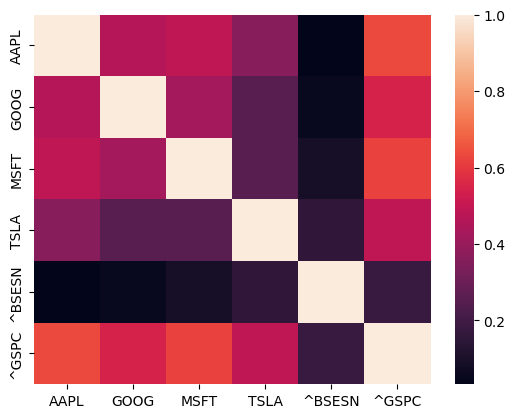

In [29]:
sns.heatmap(returns.corr())